In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# import and read csv file
df = pd.read_csv('2019.csv')
df_2018 = pd.read_csv('2018.csv')
df_2017 = pd.read_csv('2017.csv')
df_2016 = pd.read_csv('2016.csv')
df_2015 = pd.read_csv('2015.csv')
df_2014 = pd.read_csv('2014.csv')
df_2013 = pd.read_csv('2013.csv')
df_2012 = pd.read_csv('2012.csv')
df_2011 = pd.read_csv('2011.csv')

# drop unnecessary columns
df.drop(['Rk', '2PM', '2PP', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', 'PPR', 'Fmb', 'GS'], axis=1, inplace=True)
df['Player'] = df['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])
df.rename({
'TD': 'PassingTD',
'TD.1': 'RushingTD',
'TD.2': 'ReceivingTD',
'TD.3': 'TotalTD',
'Yds': 'PassingYDs',
'Yds.1': 'RushingYDs',
'Yds.2': 'ReceivingYDs',
'Att': 'PassingAtt',
'Att.1': 'RushingAtt'
}, axis=1, inplace=True)

#separate dataframes based off position
rb_df = df[df['FantPos'] == 'RB']
qb_df = df[df['FantPos'] == 'QB']
wr_df = df[df['FantPos'] == 'WR']
te_df = df[df['FantPos'] == 'TE']

In [4]:
rushing_columns = ['RushingAtt', 'RushingYDs', 'Y/A', 'RushingTD']
receiving_columns = ['Tgt', 'Rec', 'ReceivingYDs', 'Y/R', 'ReceivingTD']
passing_columns = ['PassingAtt', 'PassingYDs', 'PassingTD', 'Int']

def transform_columns(df, new_column_list):
    df = df[['Player', 'Tm', 'Age', 'G'] + new_column_list + ['FL']]
    return df

In [5]:
rb_df = transform_columns(rb_df, rushing_columns + receiving_columns)
wr_df = transform_columns(wr_df, receiving_columns + rushing_columns)
te_df = transform_columns(te_df, receiving_columns)
qb_df = transform_columns(qb_df, passing_columns + rushing_columns)

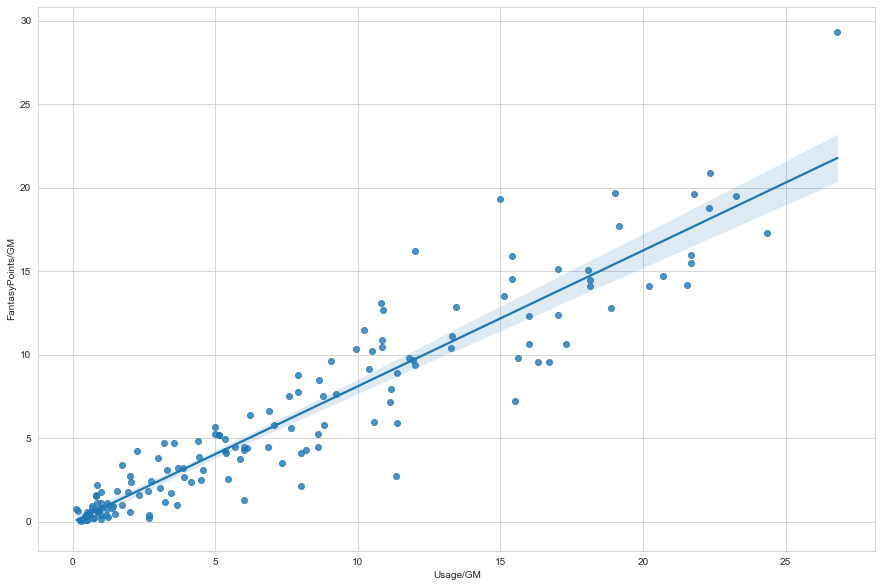

In [6]:
rb_df['FantasyPoints'] = rb_df['RushingYDs']*0.1 + rb_df['RushingTD']*6 + rb_df['Rec'] + rb_df['ReceivingYDs']*0.1 + rb_df ['ReceivingTD']*6 - rb_df['FL']*2

#Create new column for Fantasy points per game.
rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints']/rb_df['G']
rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))

#Create new column for usage per game. Usage is defined as # of targets + carries
rb_df['Usage/GM'] = (rb_df['RushingAtt'] + rb_df['Tgt'])/rb_df['G']

#round each row value to two decimal places
rb_df['Usage/GM'] = rb_df['Usage/GM'].apply(lambda x: round(x, 2))

#just for styling, imported seaborn earlier as sns.
sns.set_style('whitegrid')

#create a canvas with matplotlib
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

#basic regression scatter plot with trendline
plot = sns.regplot(
x=rb_df['Usage/GM'],
y=rb_df['FantasyPoints/GM'],
scatter=True,)



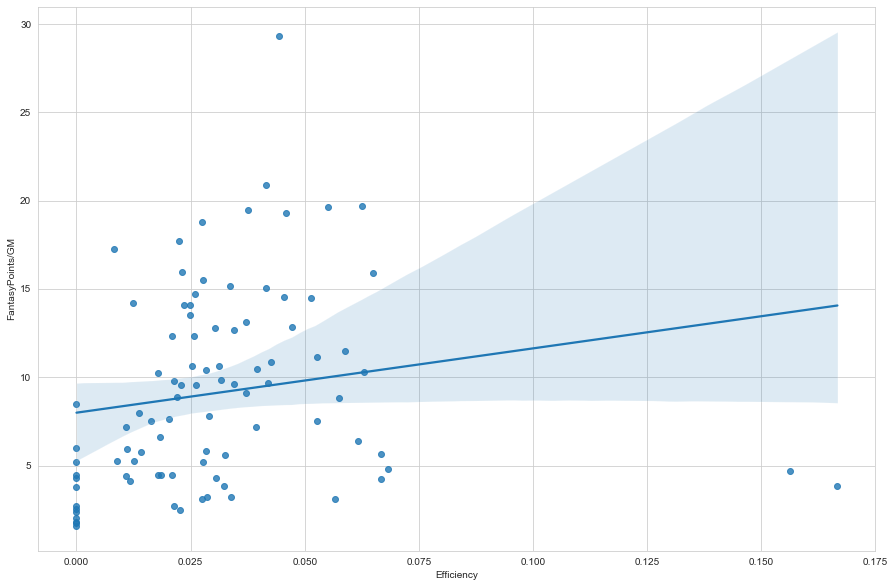

In [7]:
#How does efficiency correlate to fantasy football performance?
rb_df['Efficiency'] = (rb_df['RushingTD']+ rb_df['ReceivingTD'])/(rb_df['RushingAtt'] + rb_df['Tgt'])
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

#Make sure there is an adequete sample size
rb_df = rb_df[rb_df['RushingAtt'] > 20]
plot = sns.regplot(
x=rb_df['Efficiency'],
y=rb_df['FantasyPoints/GM'],
scatter=True)

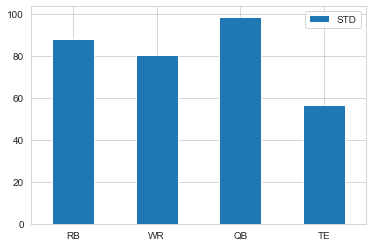

In [8]:
wr_df['FantasyPoints'] = wr_df['RushingYDs']*0.1 + wr_df['RushingTD']*6 + wr_df['Rec'] + wr_df['ReceivingYDs']*0.1 + wr_df ['ReceivingTD']*6 - wr_df['FL']*2
qb_df['FantasyPoints'] = qb_df['RushingYDs']*0.1 + qb_df['RushingTD']*6 + qb_df['PassingTD']*4 - qb_df['Int'] + qb_df['PassingYDs']*0.025  - qb_df['FL']*2
te_df['FantasyPoints'] = te_df['Rec'] + te_df['ReceivingYDs']*0.1 + te_df ['ReceivingTD']*6 - te_df['FL']*2

std_rb_fpts = rb_df['FantasyPoints'].std()
std_wr_fpts = wr_df['FantasyPoints'].std()
std_qb_fpts = qb_df['FantasyPoints'].std()
std_te_fpts = te_df['FantasyPoints'].std()

stds = [std_rb_fpts, std_wr_fpts, std_qb_fpts, std_te_fpts]
index = ['RB', 'WR', 'QB', 'TE']
std_df = pd.DataFrame({'STD': stds}, index=index)
ax = std_df.plot.bar(rot=0)

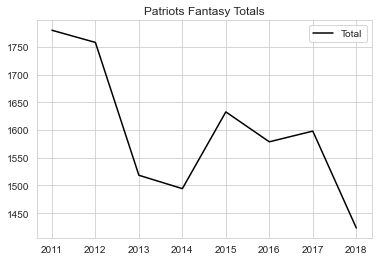

In [9]:
pats_df_2018 = df_2018[df_2018['Tm'] == 'NWE']
pats_df_2017 = df_2017[df_2017['Tm'] == 'NWE']
pats_df_2016 = df_2016[df_2016['Tm'] == 'NWE']
pats_df_2015 = df_2015[df_2015['Tm'] == 'NWE']
pats_df_2014 = df_2014[df_2014['Tm'] == 'NWE']
pats_df_2013 = df_2013[df_2013['Tm'] == 'NWE']
pats_df_2012 = df_2012[df_2012['Tm'] == 'NWE']
pats_df_2011 = df_2011[df_2011['Tm'] == 'NWE']

total_2018 = pats_df_2018['FantasyPoints'].sum()
total_2017 = pats_df_2017['FantasyPoints'].sum()
total_2016 = pats_df_2016['FantasyPoints'].sum()
total_2015 = pats_df_2015['FantasyPoints'].sum()
total_2014 = pats_df_2014['FantasyPoints'].sum()
total_2013 = pats_df_2013['FantasyPoints'].sum()
total_2012 = pats_df_2012['FantasyPoints'].sum()
total_2011 = pats_df_2011['FantasyPoints'].sum()

totals = [total_2011, total_2012, total_2013, total_2014, total_2015, total_2016, total_2017, total_2018]
index2 = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
totals_df = pd.DataFrame({'Total': totals}, index=index2)
ax2 = totals_df.plot.line(color='black', title='Patriots Fantasy Totals')

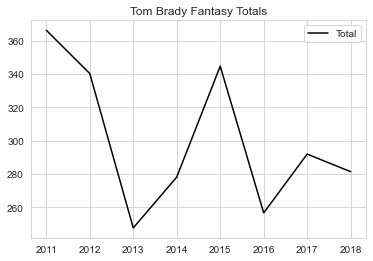

In [20]:
tb_df_2018 = df_2018[df_2018['Player'] == 'Tom Brady']
tb_df_2017 = df_2017[df_2017['Player'] == 'Tom Brady']
tb_df_2016 = df_2016[df_2016['Player'] == 'Tom Brady']
tb_df_2015 = df_2015[df_2015['Player'] == 'Tom Brady']
tb_df_2014 = df_2014[df_2014['Player'] == 'Tom Brady']
tb_df_2013 = df_2013[df_2013['Player'] == 'Tom Brady']
tb_df_2012 = df_2012[df_2012['Player'] == 'Tom Brady']
tb_df_2011 = df_2011[df_2011['Player'] == 'Tom Brady']

tb_total_2018 = tb_df_2018['FantasyPoints'].sum()
tb_total_2017 = tb_df_2017['FantasyPoints'].sum()
tb_total_2016 = tb_df_2016['FantasyPoints'].sum()
tb_total_2015 = tb_df_2015['FantasyPoints'].sum()
tb_total_2014 = tb_df_2014['FantasyPoints'].sum()
tb_total_2013 = tb_df_2013['FantasyPoints'].sum()
tb_total_2012 = tb_df_2012['FantasyPoints'].sum()
tb_total_2011 = tb_df_2011['FantasyPoints'].sum()

totals_tb = [tb_total_2011, tb_total_2012, tb_total_2013, tb_total_2014, tb_total_2015, tb_total_2016, tb_total_2017, tb_total_2018]
index2 = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
tb_totals_df = pd.DataFrame({'Total': totals_tb}, index=index2)
ax3 = tb_totals_df.plot.line(color='black', title='Tom Brady Fantasy Totals')

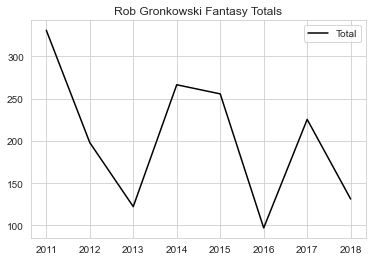

In [27]:
je_df_2018 = df_2018[df_2018['Player'] == 'Julian Edelman']
je_df_2017 = df_2017[df_2017['Player'] == 'Julian Edelman']
je_df_2016 = df_2016[df_2016['Player'] == 'Julian Edelman']
je_df_2015 = df_2015[df_2015['Player'] == 'Julian Edelman']
je_df_2014 = df_2014[df_2014['Player'] == 'Julian Edelman']
je_df_2013 = df_2013[df_2013['Player'] == 'Julian Edelman']
je_df_2012 = df_2012[df_2012['Player'] == 'Julian Edelman']
je_df_2011 = df_2011[df_2011['Player'] == 'Julian Edelman']

je_total_2018 = je_df_2018['FantasyPoints'].sum()
je_total_2017 = je_df_2017['FantasyPoints'].sum()
je_total_2016 = je_df_2016['FantasyPoints'].sum()
je_total_2015 = je_df_2015['FantasyPoints'].sum()
je_total_2014 = je_df_2014['FantasyPoints'].sum()
je_total_2013 = je_df_2013['FantasyPoints'].sum()
je_total_2012 = je_df_2012['FantasyPoints'].sum()
je_total_2011 = je_df_2011['FantasyPoints'].sum()

totals_je = [je_total_2011, je_total_2012, je_total_2013, je_total_2014, je_total_2015, je_total_2016, je_total_2017, je_total_2018]

rg_df_2018 = df_2018[df_2018['Player'] == 'Rob Gronkowski']
rg_df_2017 = df_2017[df_2017['Player'] == 'Rob Gronkowski']
rg_df_2016 = df_2016[df_2016['Player'] == 'Rob Gronkowski']
rg_df_2015 = df_2015[df_2015['Player'] == 'Rob Gronkowski']
rg_df_2014 = df_2014[df_2014['Player'] == 'Rob Gronkowski']
rg_df_2013 = df_2013[df_2013['Player'] == 'Rob Gronkowski']
rg_df_2012 = df_2012[df_2012['Player'] == 'Rob Gronkowski']
rg_df_2011 = df_2011[df_2011['Player'] == 'Rob Gronkowski']

rg_total_2018 = rg_df_2018['FantasyPoints'].sum()
rg_total_2017 = rg_df_2017['FantasyPoints'].sum()
rg_total_2016 = rg_df_2016['FantasyPoints'].sum()
rg_total_2015 = rg_df_2015['FantasyPoints'].sum()
rg_total_2014 = rg_df_2014['FantasyPoints'].sum()
rg_total_2013 = rg_df_2013['FantasyPoints'].sum()
rg_total_2012 = rg_df_2012['FantasyPoints'].sum()
rg_total_2011 = rg_df_2011['FantasyPoints'].sum()

totals_rg = [rg_total_2011, rg_total_2012, rg_total_2013, rg_total_2014, rg_total_2015, rg_total_2016, rg_total_2017, rg_total_2018]
index2 = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
rg_totals_df = pd.DataFrame({'Total': totals_rg}, index=index2)
ax3 = rg_totals_df.plot.line(color='black', title='Rob Gronkowski Fantasy Totals')

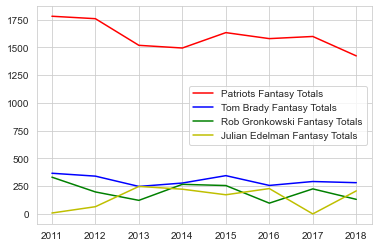

In [28]:
plt.plot(index2, totals, 'r', label='Patriots Fantasy Totals')
plt.plot(index2, totals_tb, 'b', label='Tom Brady Fantasy Totals')
plt.plot(index2, totals_rg, 'g', label='Rob Gronkowski Fantasy Totals')
plt.plot(index2, totals_je, 'y', label='Julian Edelman Fantasy Totals')
plt.legend()
plt.show()

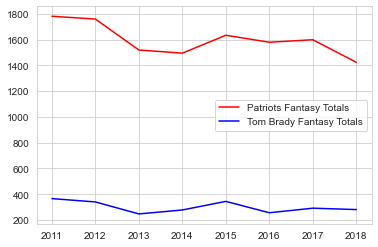

In [29]:
plt.plot(index2, totals, 'r', label='Patriots Fantasy Totals')
plt.plot(index2, totals_tb, 'b', label='Tom Brady Fantasy Totals')
plt.legend()
plt.show()